In [1]:
!pip install gymnasium

In [2]:
import gymnasium as gym
import numpy as np
import random
import time

In [3]:
# env = gym.make('FrozenLake-v1', render_mode="ansi")
from IPython import display
from gymnasium.envs.toy_text.frozen_lake import FrozenLakeEnv
from gymnasium.envs.toy_text.taxi import TaxiEnv
env = FrozenLakeEnv(desc=None, map_name="4x4", render_mode="ansi", is_slippery=True)
# FrozenLake8x8
# env = FrozenLakeEnv(desc=None, map_name="8x8", render_mode="ansi", is_slippery=True)
# Taxi
# env = TaxiEnv()

In [4]:
# Initialize Q-value table randomly
q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [5]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100 # Each environment can have a different episode length

In [6]:
def q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        for step in range(num_steps_per_episode):
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            next_state, reward, terminated, truncated, _ = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))

            reward_episode += reward
            state = next_state

            if terminated or truncated:
                done = True

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

In [7]:
q_table, rewards_all = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [8]:
q_table

array([[0.50496076, 0.47416793, 0.4797675 , 0.47509564],
       [0.27823419, 0.30786064, 0.26836727, 0.47461005],
       [0.43388822, 0.39489261, 0.38971165, 0.44628015],
       [0.17299531, 0.36081124, 0.25750781, 0.42431889],
       [0.52755693, 0.41643942, 0.38793926, 0.36673039],
       [0.        , 0.        , 0.        , 0.        ],
       [0.10340814, 0.10839437, 0.4009662 , 0.01247571],
       [0.        , 0.        , 0.        , 0.        ],
       [0.31362372, 0.45516639, 0.47376499, 0.58001673],
       [0.49208765, 0.63752171, 0.44166761, 0.44600939],
       [0.62888069, 0.45960319, 0.34062405, 0.31857265],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.45007264, 0.58945827, 0.70085132, 0.43075133],
       [0.72247668, 0.85458364, 0.77675334, 0.74823702],
       [0.        , 0.        , 0.        , 0.        ]])

In [9]:
sum(rewards_all)

13227.0

In [10]:
sum(rewards_all[0:1000])

238.0

In [11]:
sum(rewards_all[1000:2000])

654.0

In [12]:
sum(rewards_all[2000:3000])

683.0

In [13]:
sum(rewards_all[9000:10000])

697.0

In [14]:
sum(rewards_all[19000:20000])

693.0

In [15]:
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt

In [16]:
def play(env, q_table, render=False):
    state, _ = env.reset()
    total_reward = 0
    steps = 0
    done = False

    if render:
        plt.axis('off')

    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        steps += 1
        if render:
            print(env.render())
            time.sleep(0.5)
            if not done:
                display.clear_output(wait=True)

        if terminated or truncated:
            done = True

        state = next_state

    return (total_reward, steps)

(1.0, 74)

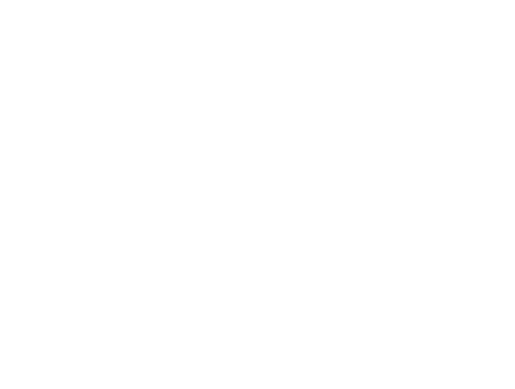

In [17]:
play(env, q_table, True)

In [18]:
def play_multiple_times(env, q_table, max_episodes):
    success = 0
    list_of_steps = []
    for i in range(max_episodes):
        total_reward, steps = play(env, q_table)

        if total_reward > 0:
            success += 1
            list_of_steps.append(steps)

    print(f'Number of successes: {success}/{max_episodes}')
    print(f'Average number of steps: {np.mean(list_of_steps)}')

In [19]:
play_multiple_times(env, q_table, 1000)

Number of successes: 818/1000
Average number of steps: 46.39242053789731


In [20]:
window = 100
average_y = []
for ind in range(len(rewards_all) - window + 1):
    average_y.append(np.mean(rewards_all[ind:ind+window]))

In [21]:
for ind in range(window - 1):
    average_y.insert(0, np.nan)

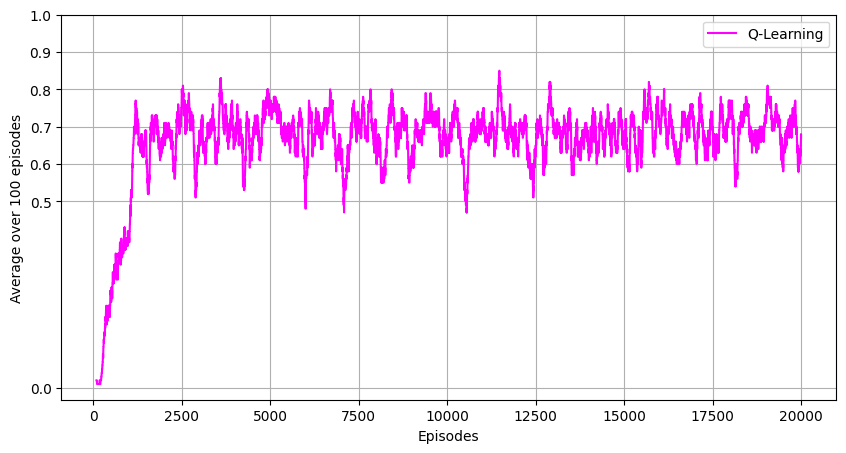

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all)), average_y, color='magenta', label='Q-Learning')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

In [23]:
def sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []

    for episode in range(num_episodes):
        state, _ = env.reset()
        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate * episode)

        exploration = random.uniform(0, 1)
        if exploration < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])

        for step in range(num_steps_per_episode):
            next_state, reward, terminated, truncated, _ = env.step(action)

            exploration = random.uniform(0, 1)
            if exploration < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table[next_state, :])

            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
                                     learning_rate * (reward + gamma * q_table[next_state, next_action])

            reward_episode += reward
            state = next_state
            action = next_action

            if terminated or truncated:
                done = True

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

#Thực nghiệm

###Frozen Lake 4x4

In [24]:
env = FrozenLakeEnv(desc=None, map_name="4x4", render_mode="ansi", is_slippery=True)

In [25]:
#q-learning
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100

start_time = time.time()
q_table_44_qlearn, rewards_all_44_qlearn = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
end_time = time.time()

print("Time: ", end_time - start_time)

Episode 19999 finished
Time:  20.268522024154663


In [26]:
play_multiple_times(env, q_table_44_qlearn, 1000)

Number of successes: 790/1000
Average number of steps: 44.07088607594937


In [27]:
window = 100
average_y_44_qlearn = []
for ind in range(len(rewards_all_44_qlearn) - window + 1):
    average_y_44_qlearn.append(np.mean(rewards_all_44_qlearn[ind:ind+window]))

for ind in range(window - 1):
    average_y_44_qlearn.insert(0, np.nan)

In [28]:
#sarsa
gamma = 0.9
learning_rate = 0.05
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.00015

num_episodes = 20000
num_steps_per_episode = 1000

start_time = time.time()
q_table_44_sarsa, rewards_all_44_sarsa = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
end_time = time.time()

print("Time: ", end_time - start_time)

Episode 19999 finished
Time:  5.276046276092529


In [29]:
play_multiple_times(env, q_table_44_sarsa, 1000)

Number of successes: 789/1000
Average number of steps: 44.41571609632446


In [30]:
window = 100
average_y_44_sarsa = []
for ind in range(len(rewards_all_44_sarsa) - window + 1):
    average_y_44_sarsa.append(np.mean(rewards_all_44_sarsa[ind:ind+window]))

for ind in range(window - 1):
    average_y_44_sarsa.insert(0, np.nan)

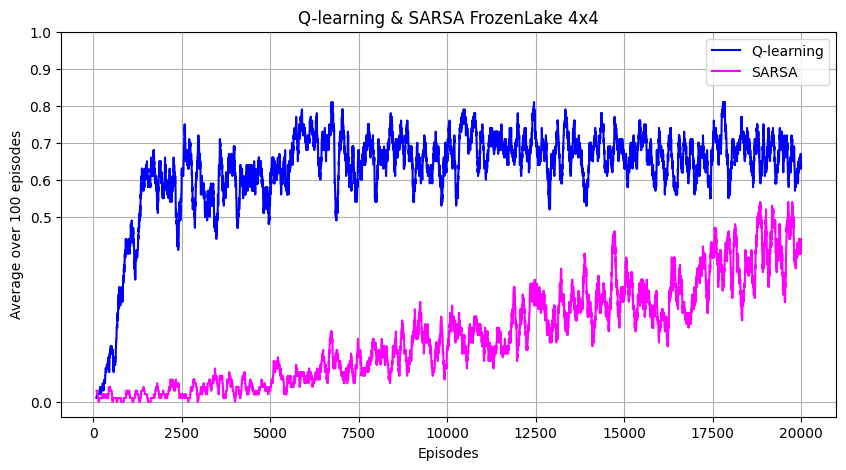

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all_44_qlearn)), average_y_44_qlearn, color='blue', label='Q-learning')
plt.plot(np.arange(len(rewards_all_44_sarsa)), average_y_44_sarsa, color='magenta', label='SARSA')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.title('Q-learning & SARSA FrozenLake 4x4')
plt.show()

###Frozen Lake 8x8

In [32]:
env = FrozenLakeEnv(desc=None, map_name="4x4", render_mode="ansi", is_slippery=True)

In [33]:
#q-learning 88
gamma = 0.99
learning_rate = 0.01
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.00015

num_episodes = 20000
num_steps_per_episode = 100

start_time = time.time()
q_table_88_qlearn, rewards_all_88_qlearn = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
end_time = time.time()

print("Time: ", end_time - start_time)

Episode 19999 finished
Time:  10.28328251838684


In [34]:
play_multiple_times(env, q_table_88_qlearn, 1000)

Number of successes: 789/1000
Average number of steps: 42.2915082382763


In [35]:
window = 100
average_y_88_qlearn = []
for ind in range(len(rewards_all_88_qlearn) - window + 1):
    average_y_88_qlearn.append(np.mean(rewards_all_88_qlearn[ind:ind+window]))

for ind in range(window - 1):
    average_y_88_qlearn.insert(0, np.nan)

In [36]:
#sarsa 88
gamma = 0.5
learning_rate = 0.01
max_epsilon = 1.0
min_epsilon = 0.6
epsilon_decay_rate = 0.0005

num_episodes = 20000
num_steps_per_episode = 1000

start_time = time.time()
q_table_88_sarsa, rewards_all_88_sarsa = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
end_time = time.time()

print("Time: ", end_time - start_time)

Episode 19999 finished
Time:  2.784940242767334


In [37]:
play_multiple_times(env, q_table_88_sarsa, 1000)

Number of successes: 151/1000
Average number of steps: 19.105960264900663


In [38]:
window = 100
average_y_88_sarsa = []
for ind in range(len(rewards_all_88_sarsa) - window + 1):
    average_y_88_sarsa.append(np.mean(rewards_all_88_sarsa[ind:ind+window]))

for ind in range(window - 1):
    average_y_88_sarsa.insert(0, np.nan)

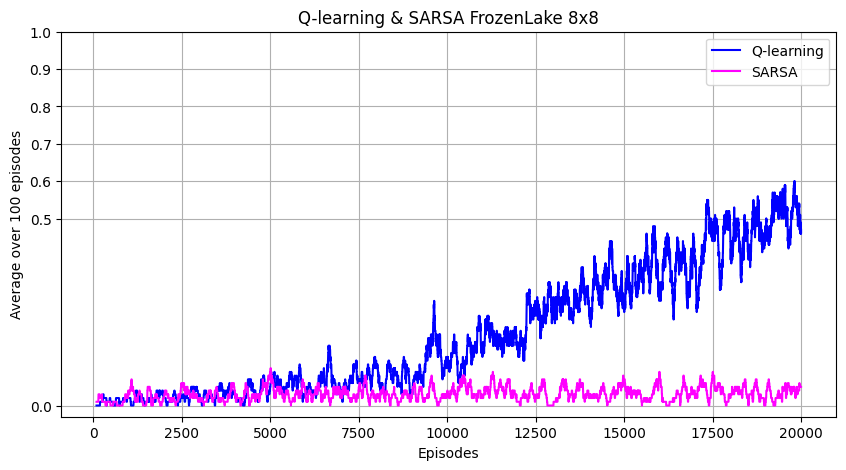

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all_88_qlearn)), average_y_88_qlearn, color='blue', label='Q-learning')
plt.plot(np.arange(len(rewards_all_88_sarsa)), average_y_88_sarsa, color='magenta', label='SARSA')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.title('Q-learning & SARSA FrozenLake 8x8')
plt.show()

###Taxi

In [40]:
env = TaxiEnv()

In [41]:
#taxi qlearn
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.0005

num_episodes = 20000
num_steps_per_episode = 100

start_time = time.time()
q_table_taxi_qlearn, rewards_all_taxi_qlearn = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
end_time = time.time()

print("Time: ", end_time - start_time)

Episode 19999 finished
Time:  14.87396764755249


In [42]:
play_multiple_times(env, q_table_taxi_qlearn, 1000)

Number of successes: 1000/1000
Average number of steps: 13.209


In [43]:
window = 100
average_y_taxi_qlearn = []
for ind in range(len(rewards_all_taxi_qlearn) - window + 1):
    average_y_taxi_qlearn.append(np.mean(rewards_all_taxi_qlearn[ind:ind+window]))

for ind in range(window - 1):
    average_y_taxi_qlearn.insert(0, np.nan)

In [44]:
#sarsa taxi
gamma = 0.9
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.0005

num_episodes = 20000
num_steps_per_episode = 100

start_time = time.time()
q_table_taxi_sarsa, rewards_all_taxi_sarsa = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
end_time = time.time()

print("Time: ", end_time - start_time)

Episode 19999 finished
Time:  12.338794231414795


In [45]:
play_multiple_times(env, q_table_taxi_sarsa, 1000)

Number of successes: 972/1000
Average number of steps: 13.61522633744856


In [46]:
window = 100
average_y_taxi_sarsa = []
for ind in range(len(rewards_all_taxi_sarsa) - window + 1):
    average_y_taxi_sarsa.append(np.mean(rewards_all_taxi_sarsa[ind:ind+window]))

for ind in range(window - 1):
    average_y_taxi_sarsa.insert(0, np.nan)

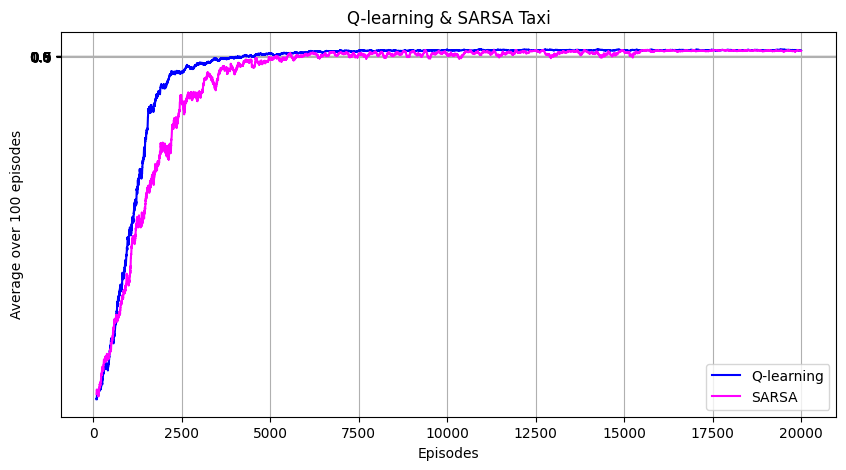

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all_taxi_qlearn)), average_y_taxi_qlearn, color='blue', label='Q-learning')
plt.plot(np.arange(len(rewards_all_taxi_sarsa)), average_y_taxi_sarsa, color='magenta', label='SARSA')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.title('Q-learning & SARSA Taxi')
plt.show()

#Nhận xét

###Q-learning có hiệu suất tốt hơn SARSA ở cả 3 env.
+ Frozen Lake 4x4: Cả Q-Learning và SARSA đều có rewards_all tăng dần và có xu hướng ổn định dần, mặc dù vẫn có những sự dao động. Q-learning cho thấy tốc độ hội tụ nhanh hơn và kết quả ổn định hơn SARSA.
+ Frozen Lake 8x8: Q-Learning vượt trội hơn hẳn SARSA. Dù đã chỉnh các hyperparameters nhưng hiệu suất của SARSA vẫn thấp hơn đáng kể so với Q-Learning.
+ Taxi: Cả hai thuật toán có rewards_all gần 1.0 sau khoảng 5.000 episodes, với tỷ lệ thành công rất cao, nên không có sự khác biệt lớn.

###Kết luận:
+ Q-Learning là lựa chọn phù hợp hơn, đặc biệt là trong các môi trường phức tạp như FrozenLake 8x8, nơi dùng SARSA gần như không hiệu quả.
+ Thời gian chạy của Q-learning và SARSA chênh lệch không nhiều ở môi trường Taxi và FrozenLake 4x4. Tuy nhiên, ở môi trường FrozenLake 8x8, SARSA mất nhiều thời gian hơn nhưng vẫn cho kết quả kém hơn — cho thấy hiệu suất không tương xứng với chi phí tính toán.
+ Trong môi trường đơn giản hơn như FrozenLake 4x4 và Taxi, cả hai thuật toán đều hoạt động tốt, nhưng Q-learning vẫn có ưu thế rõ rệt về tốc độ hội tụ và độ ổn định.